### Getting data

In [27]:
import pandas as pd
data=pd.read_csv('../DataEngineering/Report_Layer/fact.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   empid             2000 non-null   object 
 1   designation       2000 non-null   object 
 2   courseid          2000 non-null   object 
 3   course_name       2000 non-null   object 
 4   duration_weeks    2000 non-null   int64  
 5   difficulty_level  2000 non-null   object 
 6   completion_rate   2000 non-null   float64
 7   learning_path     2000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


,empid,designation,courseid,course_name,duration_weeks,difficulty_level,completion_rate,learning_path
0,EMP283,QA,COURSE050,E-commerce Development,2,Intermediate,57.07,Cloud Computing
1,EMP179,HR,COURSE047,Data Structures,1,Advanced,74.85,Web Development
2,EMP448,Lead,COURSE029,Data Analysis with Python,5,Advanced,57.76,Data Science
3,EMP244,Lead,COURSE013,Scrum Master Certification,6,Beginner,9.10,Machine Learning
4,EMP098,HR,COURSE030,Cloud Basics,3,Advanced,5.68,Data Science


### Hypothesis Testing

1. Employees in tech roles are more likely to follow learning paths like "Machine Learning" or "Web Development

In [31]:
print(data['designation'].unique())
print(data['learning_path'].unique())

['QA' 'HR' 'Lead' 'Designer' 'DevOps' 'SDE2' 'Manager' 'SDE1']
['Cloud Computing' 'Web Development' 'Data Science' 'Machine Learning'
 'Cybersecurity']


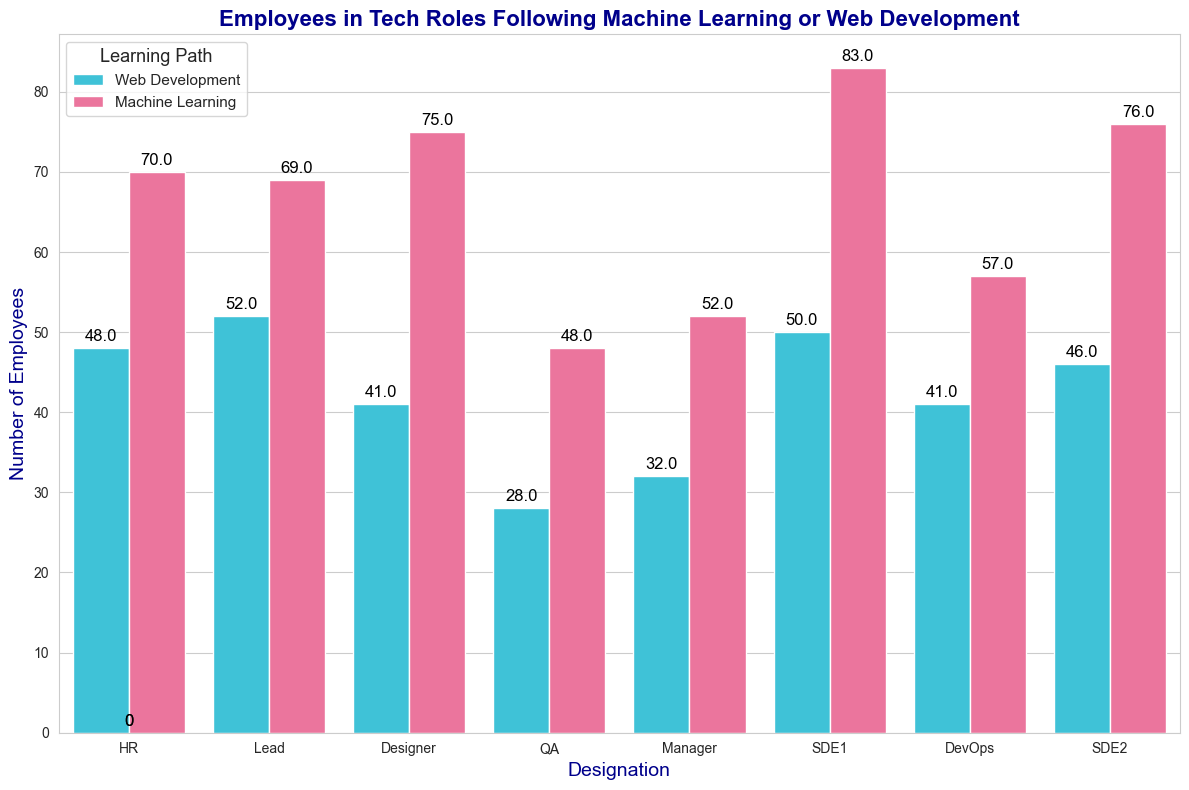

In [39]:
from turtle import color
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter for tech-related designations and learning paths
learning_paths = ['Machine Learning', 'Web Development']

# Filter the dataset based on these
df_filtered = df[df['learning_path'].isin(learning_paths)]

# Create a count plot (bar chart)
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # White grid for better visibility

# Create count plot
ax = sns.countplot(data=df_filtered, x='designation', hue='learning_path', palette=['#26D4F0','#FF6196'])

# Add title and axis labels with larger fonts and bold styling
plt.title('Employees in Tech Roles Following Machine Learning or Web Development', fontsize=16, fontweight='bold',color='darkblue')
plt.xlabel('Designation', fontsize=14,color='darkblue')
plt.ylabel('Number of Employees', fontsize=14,color='darkblue')

# Add data labels (counts) on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Customize the legend
plt.legend(title='Learning Path', title_fontsize='13', fontsize='11')

# Show plot
plt.tight_layout()
plt.show()


2. Learning Path is Determined by performance

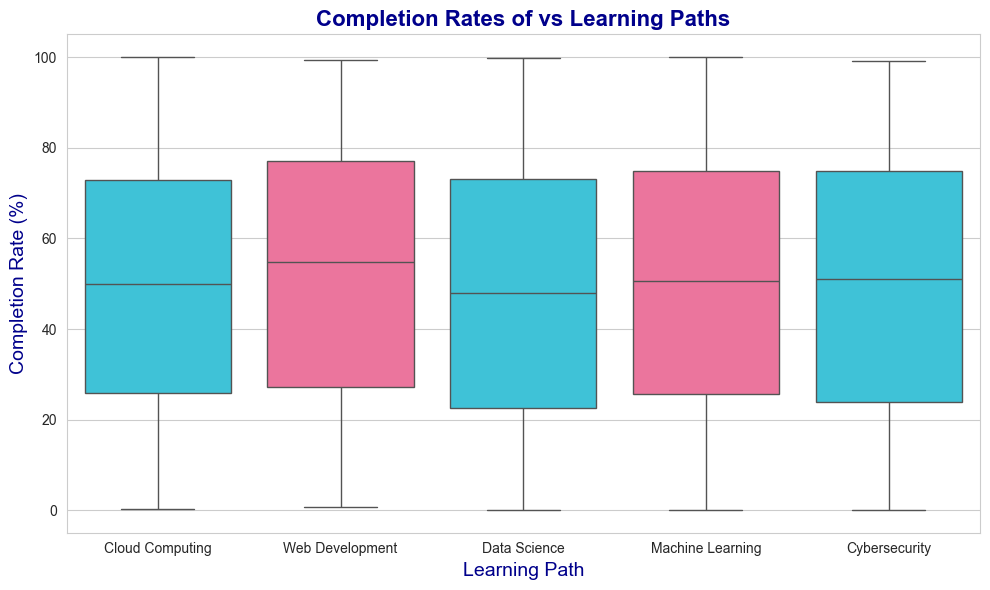

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter for "Web Development" courses and relevant learning paths
web_dev_courses = df[df['course_name'] == 'Web Development']
learning_paths_of_interest = ['Full Stack Development', 'UI/UX Design']
df_filtered = web_dev_courses[web_dev_courses['learning_path'].isin(learning_paths_of_interest)]

# Create a boxplot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # For cleaner visuals

# Use boxplot to show distribution of completion rates by learning path
sns.boxplot(data=df, x='learning_path', y='completion_rate', palette=['#26D4F0', '#FF6196'])

# Add title and labels with larger fonts
plt.title('Completion Rates of vs Learning Paths', fontsize=16, fontweight='bold',color='darkblue')
plt.xlabel('Learning Path', fontsize=14,color='darkblue')
plt.ylabel('Completion Rate (%)', fontsize=14,color='darkblue')

# Show the plot
plt.tight_layout()
plt.show()


### Correlation Matrix

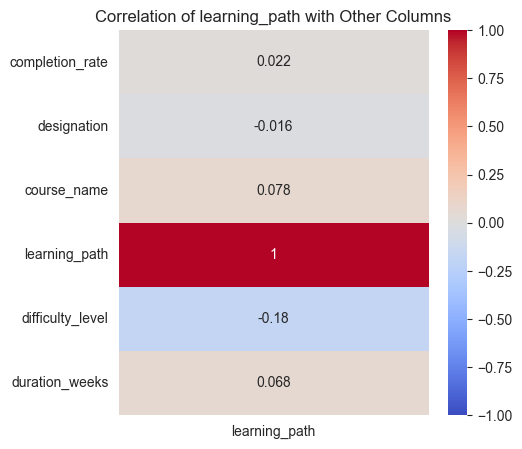

In [56]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_df=df[['completion_rate','designation','course_name','learning_path','difficulty_level','duration_weeks']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical variables
corr_df['designation'] = label_encoder.fit_transform(corr_df['designation'])
corr_df['course_name'] = label_encoder.fit_transform(corr_df['course_name'])
corr_df['learning_path'] = label_encoder.fit_transform(corr_df['learning_path'])
corr_df['difficulty_level'] = label_encoder.fit_transform(corr_df['difficulty_level'])

correlation_matrix = corr_df.corr()

# Filter correlation matrix for the seat_change_arr column
seat_change_corr = correlation_matrix[['learning_path']]

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(seat_change_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of learning_path with Other Columns')
plt.show()


### Feature Engineering

In [58]:
model_data = df[['designation', 'duration_weeks', 'difficulty_level', 'completion_rate','learning_path','course_name']]
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   designation       2000 non-null   object 
 1   duration_weeks    2000 non-null   int64  
 2   difficulty_level  2000 non-null   object 
 3   completion_rate   2000 non-null   float64
 4   learning_path     2000 non-null   object 
 5   course_name       2000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.9+ KB


In [62]:
model_data.rename(columns={'course_name':'prev_course_name'},inplace=True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   designation       2000 non-null   object 
 1   duration_weeks    2000 non-null   int64  
 2   difficulty_level  2000 non-null   object 
 3   completion_rate   2000 non-null   float64
 4   learning_path     2000 non-null   object 
 5   prev_course_name  2000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.9+ KB


### Model Development

Gradient Boosting Classifier

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming model_data is your dataset

# Initialize separate LabelEncoders for each categorical column
designation_encoder = LabelEncoder()
difficulty_level_encoder = LabelEncoder()
learning_path_encoder = LabelEncoder()
prev_course_name_encoder = LabelEncoder()

# Encode categorical variables
model_data['designation'] = designation_encoder.fit_transform(model_data['designation'])
model_data['difficulty_level'] = difficulty_level_encoder.fit_transform(model_data['difficulty_level'])
model_data['learning_path'] = learning_path_encoder.fit_transform(model_data['learning_path'])
model_data['prev_course_name'] = prev_course_name_encoder.fit_transform(model_data['prev_course_name'])

# Features and target variable
X = model_data[['designation', 'duration_weeks', 'difficulty_level', 'completion_rate','prev_course_name']]
y = model_data['learning_path']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[63  0  0  0  0]
 [ 0 80  0  0  0]
 [ 0  0 93  0  0]
 [ 0  0  0 96  0]
 [ 0  0  0  0 68]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        68

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



Step Forward Selection

In [81]:
#importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Encode categorical variables


#loading dataset 
X = model_data.drop(['learning_path'], axis=1) 
y = model_data['learning_path'] 

#splitting dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
selected_features = [] 
remaining_features = list(X.columns) 
best_accuracy = 0  

while remaining_features:
    feature_scores = []
    
    # Try adding each remaining feature and evaluate accuracy
    for feature in remaining_features:
        # Create a new feature set with the selected ones plus the current feature
        current_features = selected_features + [feature]
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]
        
        # Train the classifier on the current subset
        clf.fit(X_train_subset, y_train)
        y_pred = clf.predict(X_test_subset)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        feature_scores.append((feature, accuracy))
    
    # Select the best feature based on accuracy improvement
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    best_feature, best_feature_accuracy = feature_scores[0]
    
    # If the best accuracy improves, add the feature
    if best_feature_accuracy > best_accuracy:
        best_accuracy = best_feature_accuracy
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Selected feature: {best_feature}, Accuracy: {best_accuracy}")
    else:
        # Stop if no accuracy improvement
        print("No further improvement.")
        break

print("Final selected features:", selected_features)

Selected feature: prev_course_name, Accuracy: 0.82
Selected feature: duration_weeks, Accuracy: 0.96
Selected feature: difficulty_level, Accuracy: 1.0
No further improvement.
Final selected features: ['prev_course_name', 'duration_weeks', 'difficulty_level']
